In [94]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches
%matplotlib inline

In [86]:
M_bins

array([   0.1       ,    0.15848932,    0.25118864,    0.39810717,
          0.63095734,    1.        ,    1.58489319,    2.51188643,
          3.98107171,    6.30957344,   10.        ,   15.84893192,
         25.11886432,   39.81071706,   63.09573445,  100.        ])

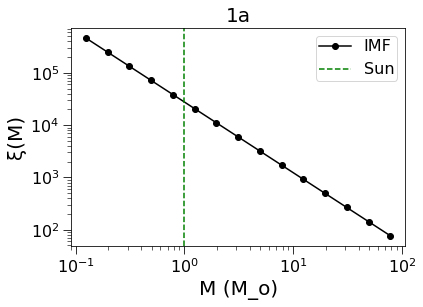

In [141]:
plt.axis()

α = 2.35
M1 = 0.1
M2 = 100
N = 1e6
ΔlogM = 0.2
ξ0 = 1.35 * N / ((M1**(-1.35))-(M2**(-1.35)))
bins = int((np.log10(M2) - np.log10(M1)) / ΔlogM)
M_bins = np.logspace(-1, 2, bins+1)
M = np.zeros(bins)
N = np.zeros(bins)
for i in range(15):
    M_min = M_bins[i]
    M_max = M_bins[i+1]
    M_bin = np.logspace(np.log10(M_min), np.log10(M_max), 100)
    N_bin = ξ0 * ((M_min**(-1.35))-(M_max**(-1.35))) / 1.35
    ξ_M = ξ0 * M_bin**(-α)
    M_tot = ξ0 * ((M_min**(-0.35))-(M_max**(-0.35))) / 0.35
    M_mean = M_tot / N_bin
    M[i] = M_mean
    N[i] = N_bin
    
    #rec = patches.Rectangle((M_min, 0.001), M_max-M_min, np.mean(ξ_M), color='b', fill=False)
    #plt.gca().add_patch(rec)
    
# Popultion of stars with M < M_o
Nsun = ξ0 * ((M1**(-1.35))-(1**(-1.35))) / 1.35
Msun = ξ0 * ((M1**(-0.35))-(1**(-0.35)))/0.35



plt.loglog(M, N, 'k-o', label='IMF')
plt.axvline(1, color='g', linestyle='--', label = 'Sun')
plt.xlabel('M (M_o)')
plt.ylabel('ξ(M)')
plt.title('1a')
plt.legend()

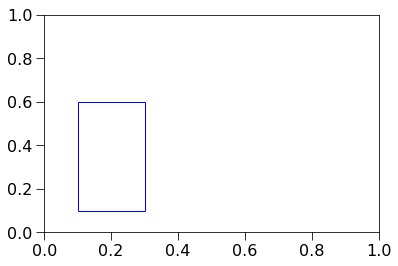

In [115]:
for i in range(bins):
    
    rec = patches.Rectangle((0.1, 0.1), ΔlogM, 0.5, color='b', fill=False)
    plt.gca().add_patch(rec)



Text(0.5,1,'1b')

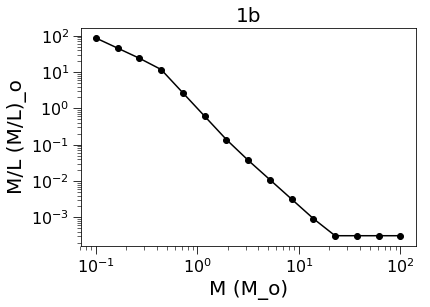

In [53]:
L = []
for m in M:
    if m < 0.43:
        L.append(0.23 * (m **2.3))
    elif 0.43 < m < 2:
        L.append(m**4)
    elif 2 < m < 20:
        L.append(1.5 * (m**3.5))
    elif m > 20:
        L.append(3200 * m)

L = np.array(L)
        
plt.loglog(M, M/L, 'k-o')
plt.xlabel('M (M_o)')
plt.ylabel('M/L (M/L)_o')
plt.title('1b')

Text(0.5,1,'1c')

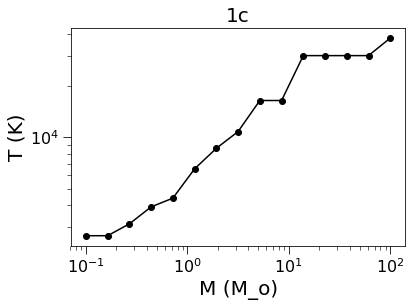

In [55]:
T_file = "TL.dat"
T_dat = Table.read(T_file, format='ascii')
T = np.zeros(len(L))

for i in range(len(L)):
    diff = L[i] - T_dat['L(L_sun)']
    ind = np.argmin(abs(diff))
    T[i]= T_dat['T(K)'][ind]
    
plt.loglog(M, T, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('T (K)')
plt.title('1c')

Text(0.5,1,'1d')

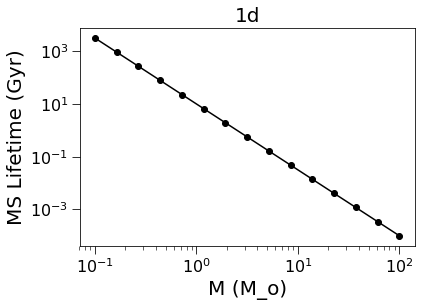

In [60]:
τ_sun = 10 #MS lifetime of the Sun in Gyrs
τ = τ_sun * M**(-2.5)
plt.loglog(M, τ, 'ko-')
plt.xlabel('M (M_o)')
plt.ylabel('MS Lifetime (Gyr)')
plt.title('1d')